In [1]:
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.
Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Vinit Pansuriya\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [2]:
df = pd.read_excel(r'Data_Train.xlsx')

In [3]:
df.columns.str.strip()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
df['JourneyDay'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day
df['JourneyMonth'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month
df['JourneyYear'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.year

In [5]:
df['DepartureHour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['DepartureMinute'] = pd.to_datetime(df['Dep_Time']).dt.minute

C:\Users\Vinit Pansuriya\AppData\Local\Temp\ipykernel_8348\2246602961.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DepartureHour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\Vinit Pansuriya\AppData\Local\Temp\ipykernel_8348\2246602961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DepartureMinute'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [6]:
df['ArrivalHour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['ArrivalMinute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\Vinit Pansuriya\AppData\Local\Temp\ipykernel_8348\1068693377.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ArrivalHour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\Vinit Pansuriya\AppData\Local\Temp\ipykernel_8348\1068693377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ArrivalMinute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [7]:
df[['Duration_hours', 'Duration_mins']] = df['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
df['Duration_hours'] = pd.to_numeric(df['Duration_hours'], errors='coerce').fillna(0).astype(int)
df['Duration_mins'] = pd.to_numeric(df['Duration_mins'], errors='coerce').fillna(0).astype(int)


In [8]:
print(df.dtypes)
print(df.head())


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
JourneyDay          int32
JourneyMonth        int32
JourneyYear         int32
DepartureHour       int32
DepartureMinute     int32
ArrivalHour         int32
ArrivalMinute       int32
Duration_hours      int64
Duration_mins       int64
dtype: object
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG →

In [9]:
cols_to_encode = ['Airline', 'Source', 'Destination','Total_Stops']
df = pd.get_dummies(df, columns=cols_to_encode, prefix=cols_to_encode, dtype=int)

In [10]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Duration',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

In [11]:
df['JourneyYear']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: JourneyYear, Length: 10683, dtype: int32

In [12]:
df.columns.value_counts().sum()
df._get_numeric_data()

,Price,JourneyDay,JourneyMonth,JourneyYear,DepartureHour,DepartureMinute,ArrivalHour,ArrivalMinute,Duration_hours,Duration_mins,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,1,0,0,0,0,1
1,7662,1,5,2019,5,50,13,15,7,25,...,0,0,0,0,0,0,1,0,0,0
2,13882,9,6,2019,9,25,4,25,19,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,12,5,2019,18,5,23,30,5,25,...,0,0,0,0,0,1,0,0,0,0
4,13302,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,2019,19,55,22,25,2,30,...,0,0,0,0,0,0,0,0,0,1
10679,4145,27,4,2019,20,45,23,20,2,35,...,0,0,0,0,0,0,0,0,0,1
10680,7229,27,4,2019,8,20,11,20,3,0,...,0,1,0,0,0,0,0,0,0,1
10681,12648,1,3,2019,11,30,14,10,2,40,...,0,0,0,0,1,0,0,0,0,1


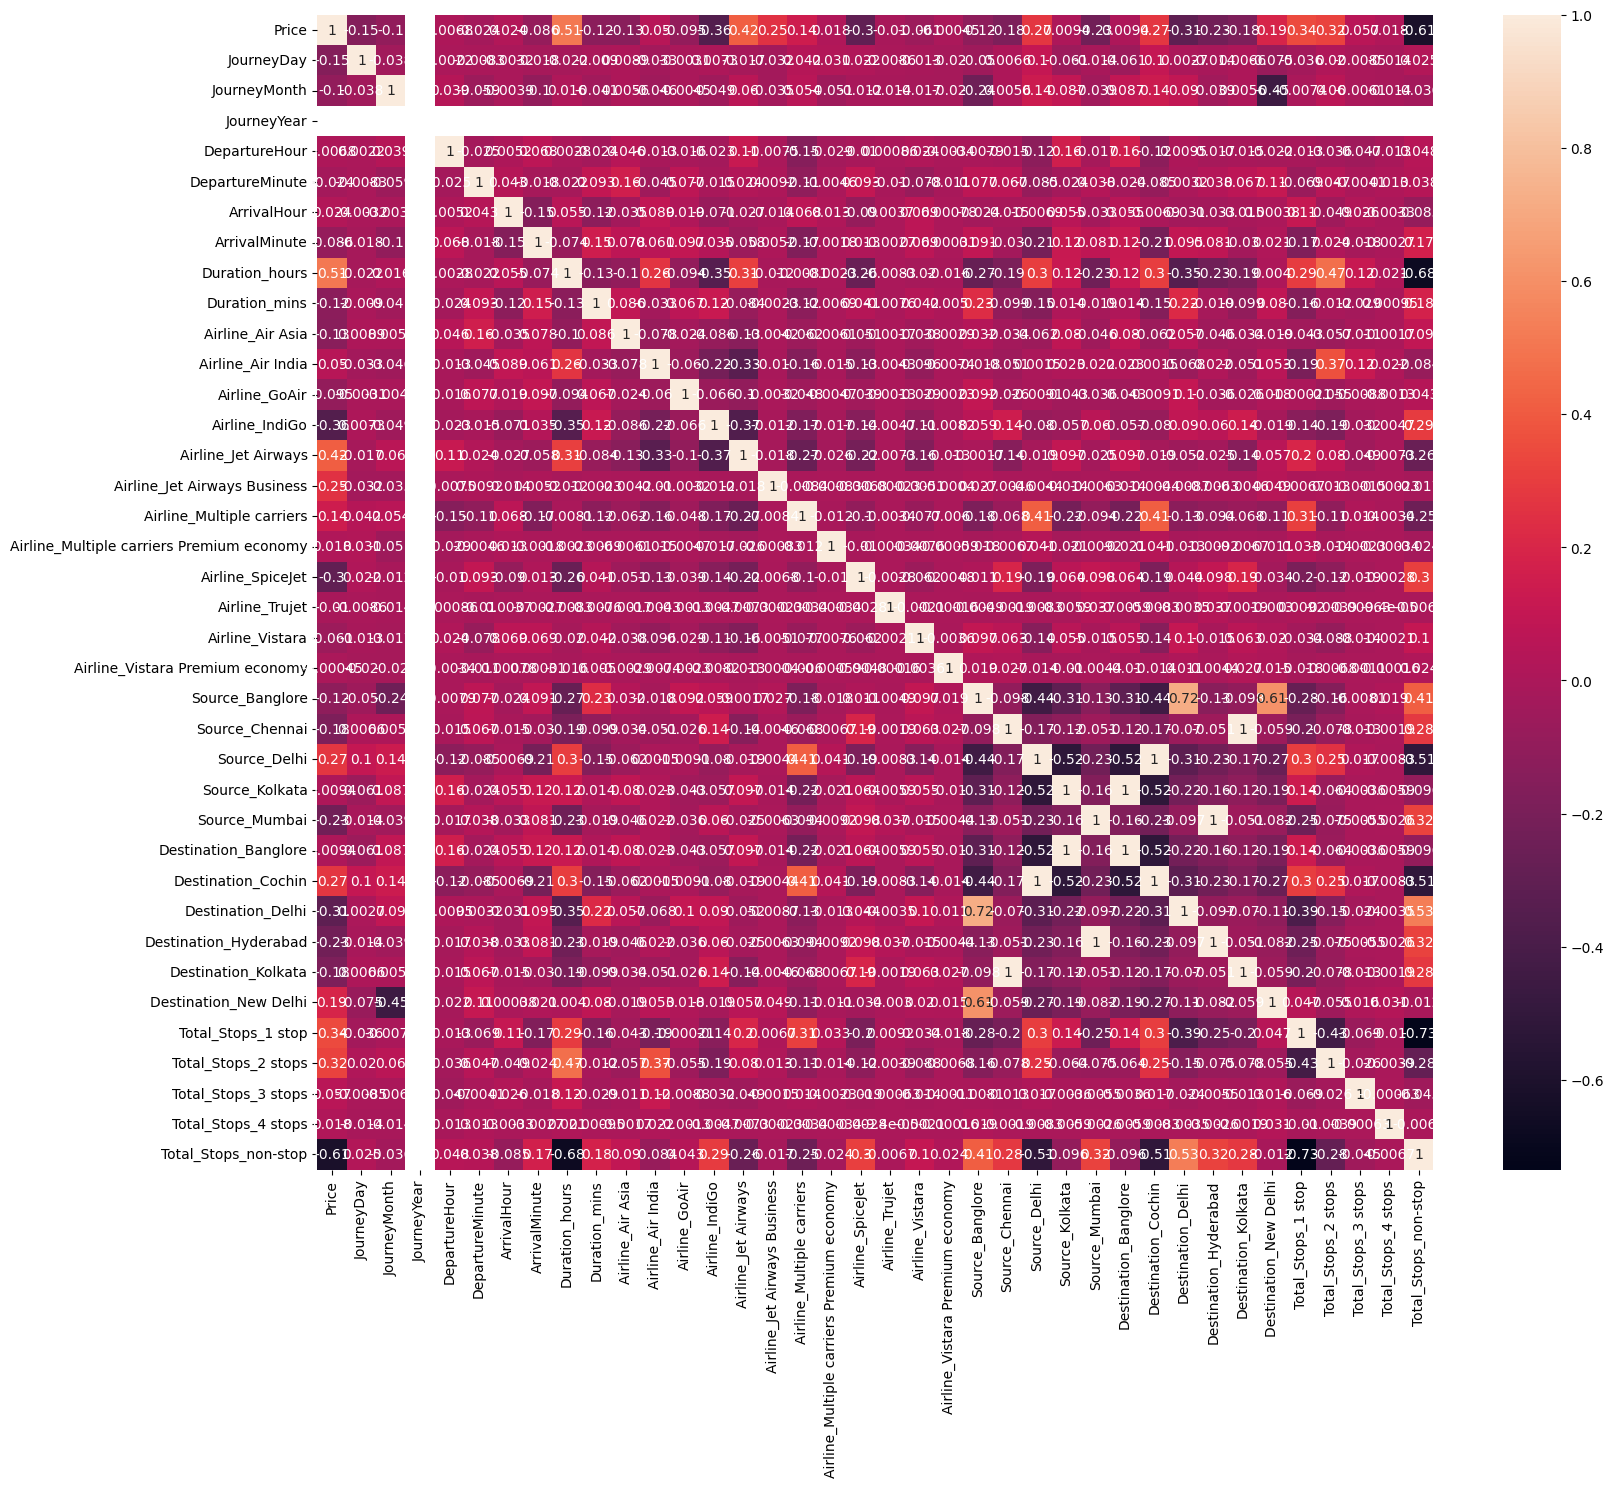

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split
xTrain,xTest, yTrain, yTest = train_test_split(x,y,test_size=0.33,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(xTrain,yTrain)
yPred = Model.predict(xTest)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(mean_absolute_error(yTest,yPred))
print(mean_squared_error(yTest,yPred))
print(r2_score(yTest,yPred))

1950.7102972983785
7516660.838981568
0.6209818438197556
